In [61]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv('../data/dataset_from_json.csv')
df.head()

,words,sentence #,tag
0,CPT,0,Incoterms
1,LAHORE,0,Incoterms
2,AIRPORT,0,Incoterms
3,PAKISTAN,0,Incoterms
4,QTY,0,O


In [63]:
len(set(df.words)), len(df)

(9359, 60340)

In [64]:
words = list(set(df["words"].values))
words.append("ENDPAD")
n_words = len(words)
words[-1], n_words

('ENDPAD', 9360)

In [65]:
tags = list(set(df['tag'].values))
n_tags = len(tags)
tags, n_tags

(['HSCode',
  'GoodsOrigin',
  'UnitPriceAmount',
  'Incoterms',
  'Quantity',
  'Tolerance',
  'GoodsDescription',
  'O'],
 8)

In [66]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 0
        self.data = df
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["words"].values.tolist(),
                                                     s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None

In [67]:
getter = SentenceGetter(df)
getter.get_next()
print(getter.get_next())

[('SERVICES', 'GoodsDescription'), ('AND', 'GoodsDescription'), ('MAINTENANCE', 'GoodsDescription'), ('AS', 'O'), ('PER', 'O'), ("BENEFICIARY'S", 'O'), ('PROFORMA', 'O'), ('INVOICE', 'O'), ('NO.', 'O'), ('201912Q016H', 'O'), ('DATED', 'O'), ('05.12.2019', 'O')]


In [68]:
sentences = getter.sentences

In [69]:
print(sentences[0])
len(sentences)

[('CPT', 'Incoterms'), ('LAHORE', 'Incoterms'), ('AIRPORT', 'Incoterms'), ('PAKISTAN', 'Incoterms'), ('QTY', 'O'), ('1', 'Quantity'), ('PC', 'Quantity'), ('OF', 'O'), ('MULTI', 'GoodsDescription'), ('MODE', 'GoodsDescription'), ('READER/TRINOCULAR', 'GoodsDescription'), ('MICROSCOPE', 'GoodsDescription'), ('SYSTEM', 'GoodsDescription'), ('MODEL', 'O')]


1620

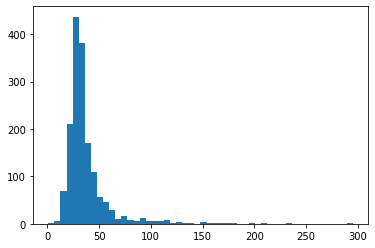

In [70]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [71]:
max_len = 50
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [72]:
# word2idx['FOB'], tag2idx['B-NW']

In [73]:
from keras.preprocessing.sequence import pad_sequences

X = [[word2idx[w[0]] for w in s] for s in sentences]

In [74]:
X

[[6521,
  4841,
  2615,
  2631,
  159,
  7798,
  665,
  3450,
  1485,
  3258,
  4136,
  4914,
  3577,
  8776],
 [2827, 812, 619, 1595, 9299, 555, 1812, 1547, 1239, 8294, 8013, 7284],
 [2827, 619, 1595, 9299, 555, 1812, 1547, 1239, 5723, 8013, 5650],
 [6521,
  4841,
  2615,
  2631,
  3826,
  7436,
  7602,
  4187,
  3450,
  3826,
  5408,
  159,
  6618,
  204,
  8286,
  4373,
  3600,
  7817,
  4328,
  7497,
  9299,
  8621,
  1595,
  9299,
  555,
  1812,
  1547,
  1239,
  4556,
  8013,
  8256],
 [3943,
  3426,
  34,
  6655,
  7996,
  2631,
  159,
  5466,
  896,
  3450,
  8713,
  1279,
  8158,
  3391,
  2998,
  227,
  1900,
  7817,
  4328,
  1734,
  9299,
  8100,
  8410,
  2866,
  1595,
  9299,
  555,
  7455,
  1239,
  3300,
  8013,
  4972],
 [3943,
  34,
  7988,
  2631,
  1700,
  9296,
  2661,
  1595,
  9299,
  555,
  1812,
  1547,
  1239,
  8900,
  8013,
  1300],
 [1027,
  4203,
  4505,
  1608,
  159,
  2135,
  2356,
  7785,
  8412,
  7817,
  4328,
  4558,
  9299,
  2356,
  1595,
  9299,


In [75]:
# so we have the same length
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words-1)

In [76]:
print(X[1])

[2827  812  619 1595 9299  555 1812 1547 1239 8294 8013 7284 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359 9359
 9359 9359 9359 9359 9359 9359 9359 9359]


In [77]:
X.shape

(1620, 50)

In [78]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [79]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]

In [80]:
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [81]:
print(y[1])

[6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [82]:
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [85]:
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=50, input_length=max_len)(input)  # 50-dim embedding
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)  # variational biLSTM
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

In [86]:
model = Model(input, out)

In [88]:
from tensorflow.keras.metrics import AUC

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy", AUC()])

In [89]:
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=5, validation_split=0.1, verbose=1)

Epoch 1/5


2022-08-17 14:47:39.766889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - ETA: 0s - loss: 0.9934 - accuracy: 0.6817 - auc: 0.9289

2022-08-17 14:53:03.179597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 326s 9s/step - loss: 0.9934 - accuracy: 0.6817 - auc: 0.9289 - val_loss: 0.7483 - val_accuracy: 0.7237 - val_auc: 0.9594
Epoch 2/5
37/37 [==============================] - 323s 9s/step - loss: 0.6958 - accuracy: 0.7430 - auc: 0.9653 - val_loss: 0.6204 - val_accuracy: 0.7648 - val_auc: 0.9717
Epoch 3/5
37/37 [==============================] - 304s 8s/step - loss: 0.5558 - accuracy: 0.8019 - auc: 0.9783 - val_loss: 0.5060 - val_accuracy: 0.8154 - val_auc: 0.9820
Epoch 4/5
37/37 [==============================] - 296s 8s/step - loss: 0.4320 - accuracy: 0.8533 - auc: 0.9869 - val_loss: 0.3710 - val_accuracy: 0.8902 - val_auc: 0.9900
Epoch 5/5
37/37 [==============================] - 297s 8s/step - loss: 0.3243 - accuracy: 0.8977 - auc: 0.9919 - val_loss: 0.2887 - val_accuracy: 0.9126 - val_auc: 0.9926


In [90]:
hist = pd.DataFrame(history.history)
hist

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
0,0.993448,0.681664,0.928904,0.748299,0.723692,0.959372
1,0.695769,0.743019,0.965274,0.620406,0.764769,0.971685
2,0.555842,0.801887,0.978290,0.506036,0.815385,0.981994
3,0.431969,0.853328,0.986909,0.371042,0.890154,0.989988
4,0.324273,0.897650,0.991904,0.288672,0.912615,0.992638


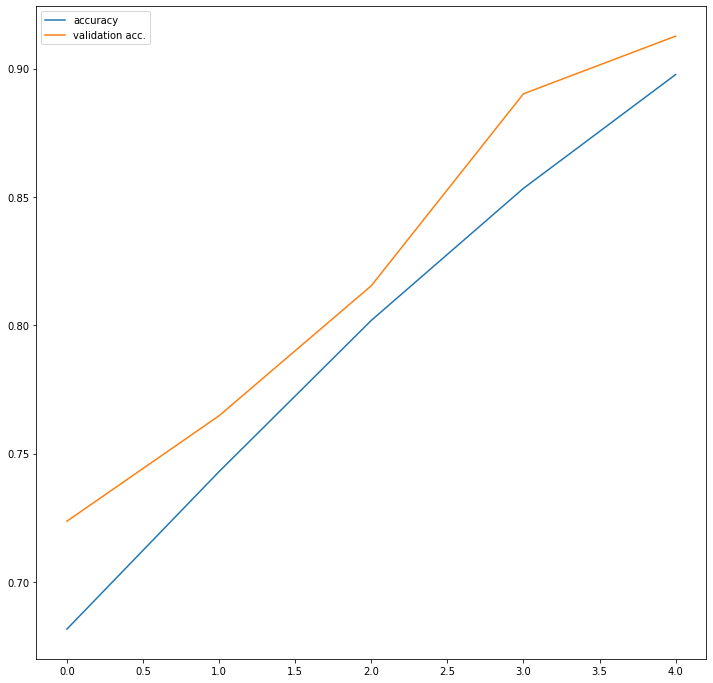

In [95]:
plt.figure(figsize=(12,12))
plt.plot(hist["accuracy"], label='accuracy')
plt.plot(hist["val_accuracy"], label='validation acc.')
plt.legend()
plt.show()

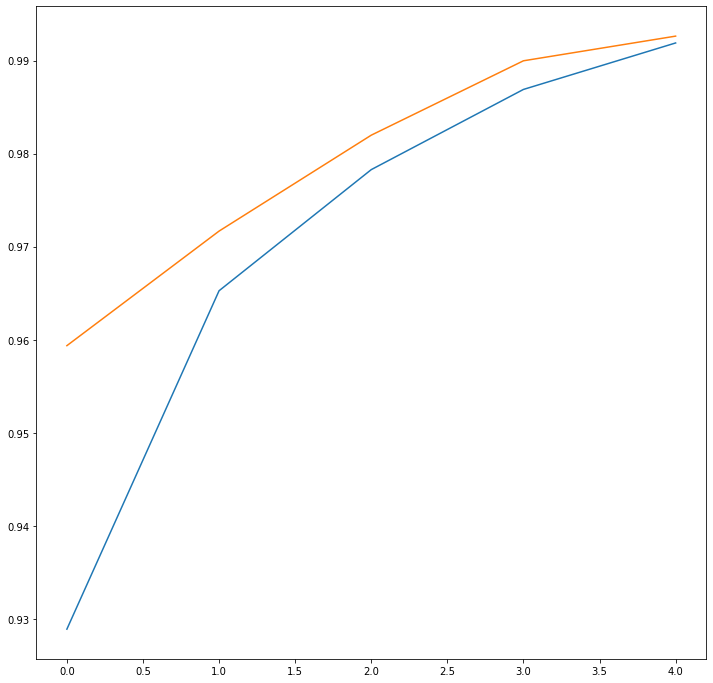

In [96]:
plt.figure(figsize=(12,12))
plt.plot(hist["auc"], label="AUC score")
plt.plot(hist["val_auc"], label="validation AUC score")
plt.show()